## Data Description

There are 3 types of input features:

    1. Objective: factual information;
    2. Examination: results of medical examination;
    3. Subjective: information given by the patient.

Features:

    1. Age | Objective Feature | age | int (days)
    2. Height | Objective Feature | height | int (cm) |
    3. Weight | Objective Feature | weight | float (kg) |
    4. Gender | Objective Feature | gender | categorical code |
    5. Systolic blood pressure | Examination Feature | ap_hi | int |
    6. Diastolic blood pressure | Examination Feature | ap_lo | int |
    7. Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |
    8. Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |
    9. Smoking | Subjective Feature | smoke | binary |
    10. Alcohol intake | Subjective Feature | alco | binary |
    11. Physical activity | Subjective Feature | active | binary |
    12. Presence or absence of cardiovascular disease | Target Variable | cardio | binary |
    
    All of the dataset values were collected at the moment of medical examination.

In [1]:
# Load necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Load the dataset

df = pd.read_csv('cardio_train.csv', delimiter=';')

In [3]:
df.head(10)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
5,8,21914,1,151,67.0,120,80,2,2,0,0,0,0
6,9,22113,1,157,93.0,130,80,3,1,0,0,1,0
7,12,22584,2,178,95.0,130,90,3,3,0,0,1,1
8,13,17668,1,158,71.0,110,70,1,1,0,0,1,0
9,14,19834,1,164,68.0,110,60,1,1,0,0,0,0


In [4]:
df.tail(10)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
69990,99986,15094,1,168,72.0,110,70,1,1,0,0,1,1
69991,99988,20609,1,159,72.0,130,90,2,2,0,0,1,0
69992,99990,18792,1,161,56.0,170,90,1,1,0,0,1,1
69993,99991,19699,1,172,70.0,130,90,1,1,0,0,1,1
69994,99992,21074,1,165,80.0,150,80,1,1,0,0,1,1
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1
69999,99999,20540,1,170,72.0,120,80,2,1,0,0,1,0


In [5]:
df.shape

(70000, 13)

In [6]:
print(f'The data consists of {df.shape[0]} rows and {df.shape[1]} columns.')

The data consists of 70000 rows and 13 columns.


In [7]:
# Dropping the column 'id' as it is of no use

df.drop('id', axis=1, inplace=True)

#### Adding years columns for better visualization

In [8]:
# Converting age into years

df['years'] = (df['age'] / 365).round().astype('int')

In [9]:
df.sample()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,years
3570,22888,1,165,67.0,130,80,1,1,0,0,1,1,63


In [10]:
# Creating new copy of dataframe

df_new = df.copy()
df_new.sample()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,years
55236,19597,1,154,58.0,120,80,2,1,0,0,1,0,54


In [11]:
# Calculating BMI for better visualization of data

df_new['bmi'] = (df['weight'] / ((df['height'] / 100)**2))
df_new.sample()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,years,bmi
56175,22365,2,161,77.0,160,90,1,1,0,0,1,1,61,29.705644


Healthy BMI ranges

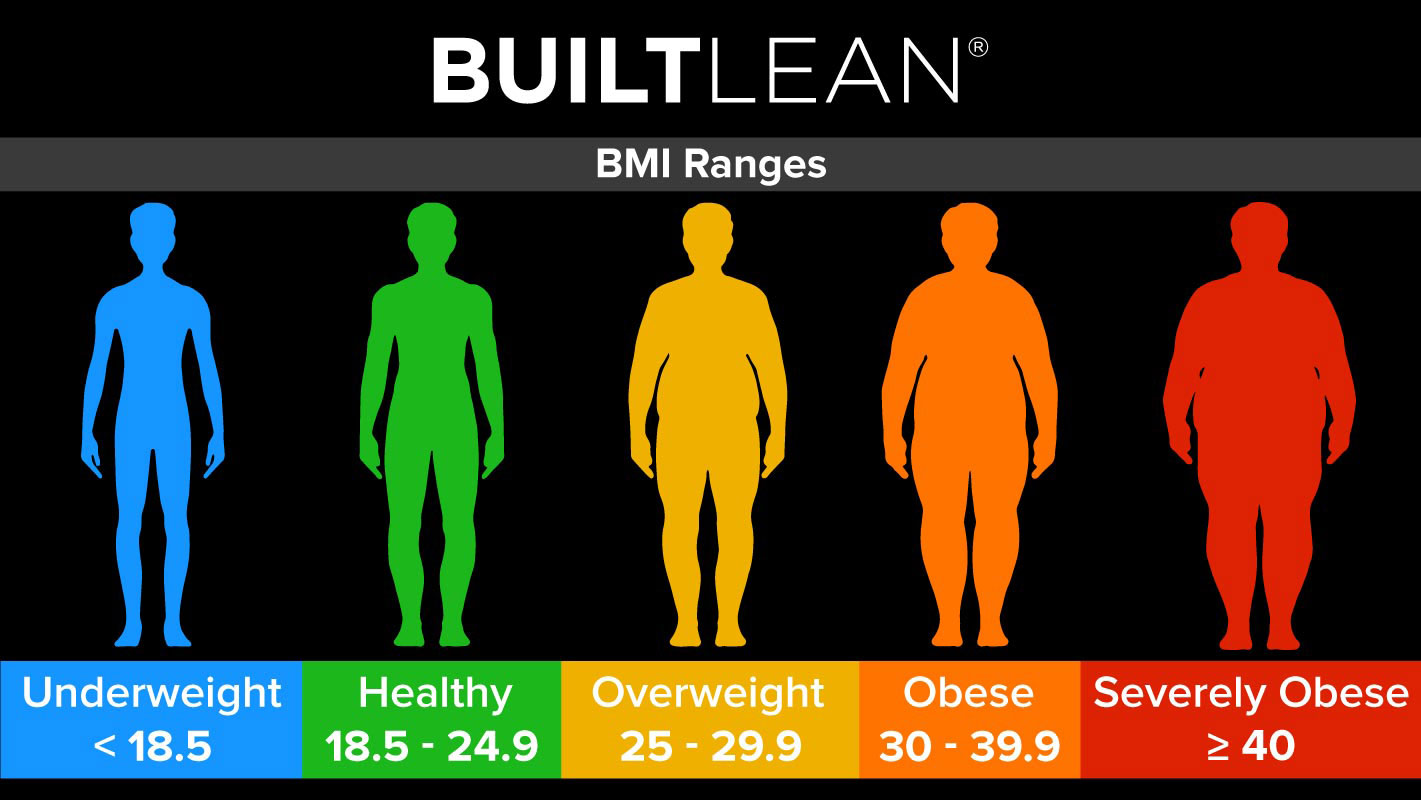

In [12]:
# Create a dictionary to map ranges to labels
bmi_labels = {
    (np.NINF, 18.5): 'Underweight',
    (18.5, 25): 'Healthy',
    (25, 30): 'Overweight',
    (30, 40): 'Obese',
    (40, np.inf): 'Severely Obese'
}

# Map the ranges to labels using the dictionary
df_new['bmi'] = df_new['bmi'].map(
    lambda x: next((v for k, v in bmi_labels.items() if k[0] < x <= k[1]), x)
)

In [13]:
df_new['gender'] = df_new['gender'].replace({1: 'Female', 2: 'Male'})
df_new['cholesterol'] = df_new['cholesterol'].replace({1: 'Normal', 2: 'Above Normal', 3: 'Well Above Normal'})
df_new['gluc'] = df_new['gluc'].replace({1: 'Normal', 2: 'Above Normal', 3: 'Well Above Normal'})
df_new['smoke'] = df_new['smoke'].replace({0: 'Non-Smoker', 1: 'Smoker'})
df_new['alco'] = df_new['alco'].replace({0: 'Non-Alcoholic', 1: 'Alcoholic'})
df_new['active'] = df_new['active'].replace({0: 'Physically Not Active', 1: 'Physically Active'})
df_new['cardio'] = df_new['cardio'].replace({0: "Don't have CVD", 1: 'Have CVD'})


In [14]:
df_new.sample()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,years,bmi
28121,18521,Male,173,100.0,120,80,Normal,Above Normal,Smoker,Non-Alcoholic,Physically Active,Don't have CVD,51,Obese


## Visualization

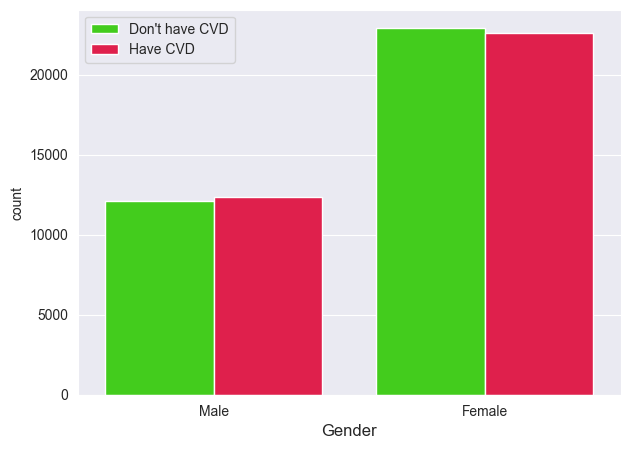

In [15]:
plt.figure(figsize=(7, 5))
sns.set_style(style='darkgrid')

sns.countplot(x=df_new['gender'], hue='cardio', data=df_new, palette='prism')
plt.legend()
plt.xlabel('Gender', fontdict = {'family': 'sans-serif', 'size': 12})
plt.show()

Men are more prone to CVD as compared to women.

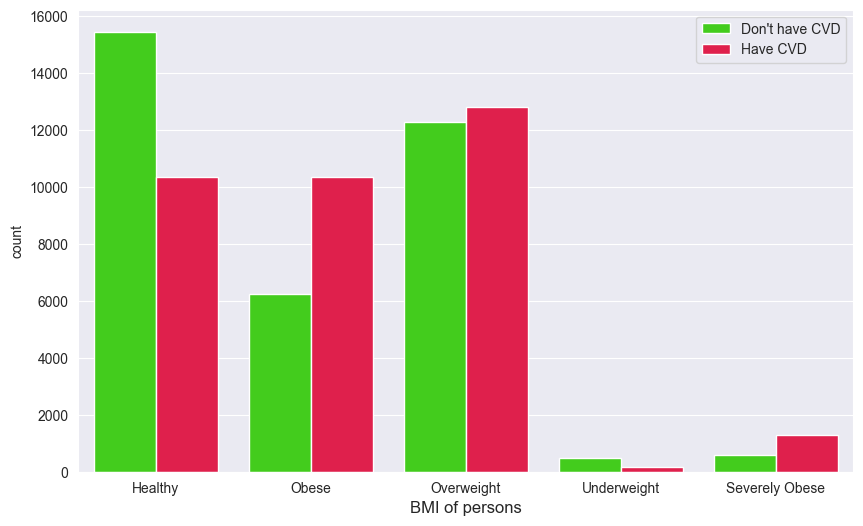

In [16]:
plt.figure(figsize=(10, 6))
sns.set_style(style='darkgrid')

sns.countplot(x = df_new['bmi'], hue='cardio', data=df_new, palette='prism')
plt.legend()
plt.xlabel('BMI of persons', fontdict = {'family': 'sans-serif', 'size': 12})
plt.show()

People who are overweight, obese or severly obese are more prone to CVD.

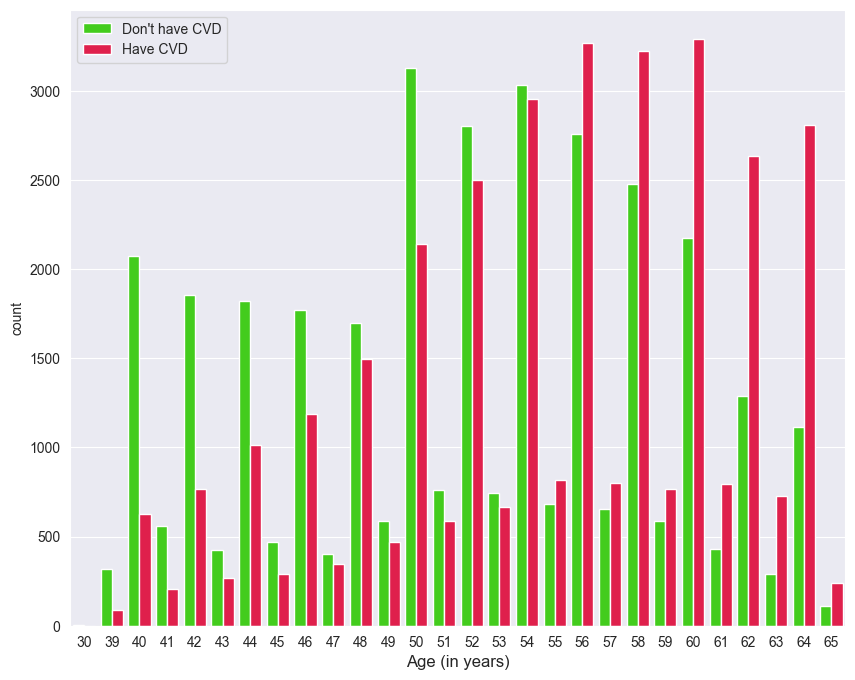

In [17]:
sns.set_style(style='darkgrid')
plt.figure(figsize=(10, 8))
sns.countplot(x='years', hue='cardio', data = df_new, palette='prism')
plt.legend()
plt.xlabel('Age (in years)', {'family': 'sans-serif', 'size': 12})
plt.show()

It can be observed that people over 55 of age are more exposed to CVD.

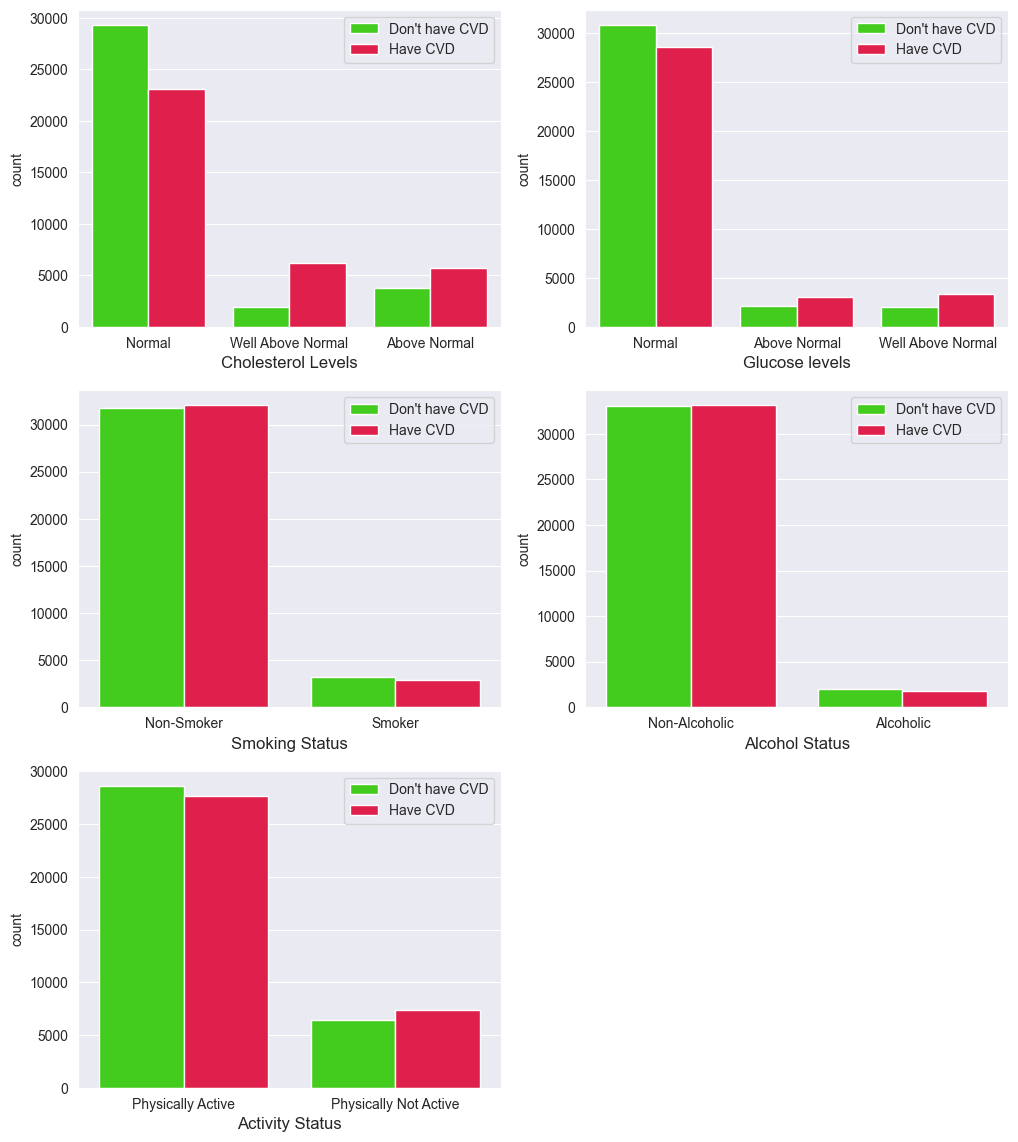

In [18]:
plt.figure(figsize=(12, 14))
sns.set_style(style='darkgrid')

plt.subplot(3, 2, 1)
sns.countplot(x = df_new['cholesterol'], hue='cardio', data=df_new, palette='prism')
plt.xlabel('Cholesterol Levels', {'family': 'sans-serif', 'size': 12})
plt.legend()

plt.subplot(3, 2, 2)
sns.countplot(x = df_new['gluc'], hue='cardio', data=df_new, palette='prism')
plt.xlabel('Glucose levels', {'family': 'sans-serif', 'size': 12})
plt.legend()

plt.subplot(3, 2, 3)
sns.countplot(x = df_new['smoke'], hue='cardio', data=df_new, palette='prism')
plt.xlabel('Smoking Status', {'family': 'sans-serif', 'size': 12})
plt.legend()

plt.subplot(3, 2, 4)
sns.countplot(x = df_new['alco'], hue='cardio', data=df_new, palette='prism')
plt.xlabel('Alcohol Status', {'family': 'sans-serif', 'size': 12})
plt.legend()

plt.subplot(3, 2, 5)
sns.countplot(x = df_new['active'], hue='cardio', data=df_new, palette='prism')
plt.xlabel('Activity Status', {'family': 'sans-serif', 'size': 12})
plt.legend()

plt.show()

It can be clearly seen that patients with CVD have higher cholesterol and blood glucose level. And, generally speaking less active.

In [19]:
# Checking for missing values

df.isnull().sum()

age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
years          0
dtype: int64

There are no missing values in the data.

In [20]:
# Checking for duplicate values

df.duplicated().sum()

24

There are 24 duplicate rows the data.

In [21]:
# Removing duplicates

df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

All duplicate rows have been removed successfully.

## Checking and Solving errors in the data

In [22]:
print(df['gender'].nunique())
print(df['cholesterol'].nunique())
print(df['gluc'].nunique())
print(df['smoke'].nunique())
print(df['alco'].nunique())
print(df['active'].nunique())
print(df['cardio'].nunique())

2
3
3
2
2
2
2


In [23]:
df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,years
count,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000
mean,19468.950126,1.349648,164.359152,74.208519,128.820453,96.636261,1.366997,1.226535,0.088159,0.053790,0.803718,0.499771,53.338945
std,2467.374620,0.476862,8.211218,14.397211,154.037729,188.504581,0.680333,0.572353,0.283528,0.225604,0.397187,0.500004,6.765633
min,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,30.000000
25%,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,48.000000
50%,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,54.000000
75%,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,58.000000
max,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,65.000000


#### Systolic Blood Pressure:

The lowest possible value for systolic blood pressure is typically around 0 mmHg. However, this is not a normal or healthy reading.

A systolic blood pressure reading of 180 mmHg or higher is considered a hypertensive crisis and requires immediate medical intervention.


#### Diastolic Blood Pressure:

The lowest possible value for diastolic blood pressure is typically around 0 mmHg, but this is not a normal or healthy reading.

A diastolic blood pressure reading of 120 mmHg or higher is considered a hypertensive crisis and requires immediate medical attention.

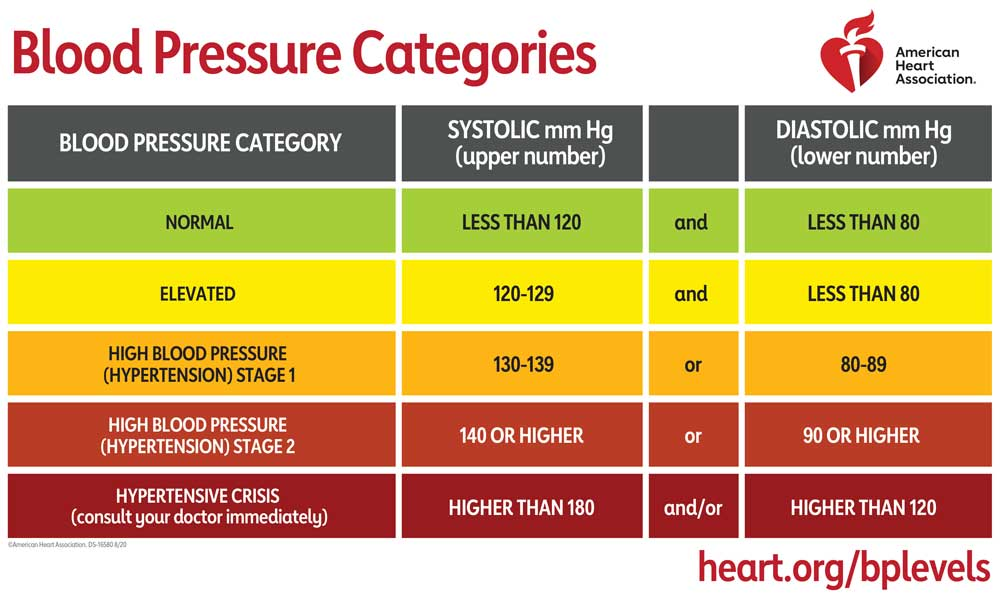


But in the data we can see that lowest and highest values for systolic blood pressure are -150 mmHg / 16020 mmHg and that for diastolic blood pressure are -70 mmHg / 11000 mmHg respectively.

This means there are some invalid values for systolic blood pressure and diastolic blood pressure. We need to clean the data.


In [24]:
# Selecting systolic blood pressure greater than 0 mmHg and lesser/equal than 180 mmHg
df = df[(df['ap_hi'] > 0) & (df['ap_hi'] <= 180)]

# Selecting diastolic blood pressure greater than 0 mmHg and lesser/equal than 120 mmHg
df = df[(df['ap_lo'] > 0) & (df['ap_lo'] <= 120)]

df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,years
count,68606.000000,68606.000000,68606.000000,68606.000000,68606.000000,68606.000000,68606.000000,68606.000000,68606.000000,68606.000000,68606.000000,68606.000000,68606.000000
mean,19459.858540,1.348366,164.361965,74.073364,126.051628,81.182623,1.362855,1.225024,0.087660,0.053188,0.803326,0.493178,53.314258
std,2469.448996,0.476456,8.199277,14.294082,17.052263,9.400528,0.677597,0.571026,0.282802,0.224409,0.397486,0.499957,6.771333
min,10798.000000,1.000000,55.000000,11.000000,7.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,30.000000
25%,17650.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,48.000000
50%,19699.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,54.000000
75%,21322.000000,2.000000,170.000000,82.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,58.000000
max,23713.000000,2.000000,250.000000,200.000000,180.000000,120.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,65.000000


#### Solving weight errors

The min and max weights in the data are 11 Kg and 200 Kg respectively which seems incorrect. Let's filter this out.

In [25]:
weights_less_than_equals_45 = df[(df['weight'] <= 45)]
weights_greater_than_equals_120 = df[(df['weight'] >= 120)]

print(len(weights_less_than_equals_45))
print(len(weights_greater_than_equals_120))

418
566


There are 418 people who weighs less than/equals 45 kg and 566 people who weighs greater than/equals 120 kg.

We can drop these rows as they don't have major impact on the data.

In [26]:
# Selecting people who weighs more than/equals 45 Kg and less than/equals 120kg

df =  df[(df['weight'] >= 45) & (df['weight'] <= 120)]

#### Solving height errors

The minimun height given in the data is 55 cm which is impossible for a 29.56yr (lowest age person in the data) old human. Height data needs some cleaning.

In [27]:
# Selecting people whose height is more than/equals 122 cm and less than/equals 200 cm
df = df[(df['height'] >= 122) & (df['height'] <= 200)]

#### Detecting and removing outliers

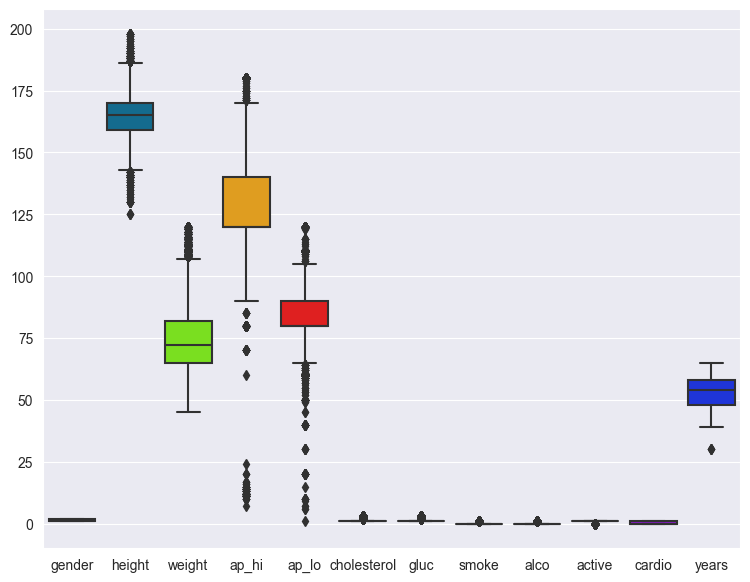

In [28]:
sns.set_style(style='darkgrid')
plt.figure(figsize=(9, 7))
joblib.dump(ada, 'cvd_
sns.boxplot(data=df.drop(['age'], axis=1) , palette='prism')
plt.show()

The oultiers in Systolic Blood Pressure and Diastolic Blood Pressure can affect training model but other outliers are genuine values and they are not due to errors or data quality issues. 

Let's get rid of them.


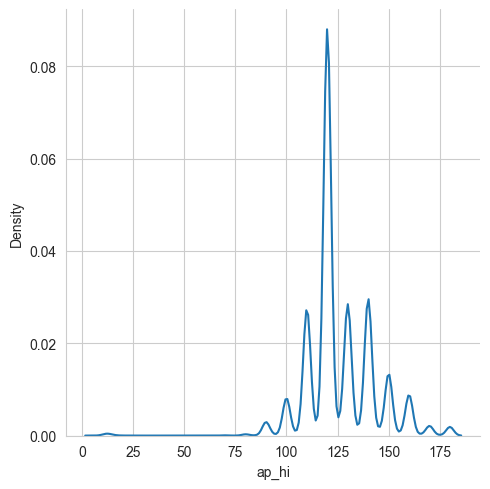

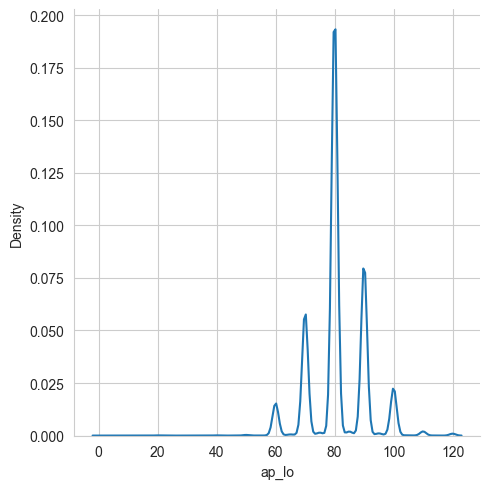

In [29]:
sns.set_style(style='whitegrid')
sns.displot(df['ap_hi'], kind='kde')
sns.displot(df['ap_lo'], kind='kde')
plt.show()

As we can clearly see that neither the data is normally distributed nor it is skewed. We can't use IQR or Z-Score method to remove outliers here.

Instead we can use quantile method to get rid of outliers.

In [30]:
print(df['ap_hi'].quantile(0.003))
print(df['ap_lo'].quantile(0.003))

80.0
60.0


There are only 0.3% values in systolic blood pressure that are less than 80 and only 0.3% that are less than 60 in diastolic blood pressure. We can filter them out as they are only 0.3% of the data. Higher values has already filtered out above.

In [31]:
df = df[(df['ap_hi'] > df['ap_hi'].quantile(0.003)) & (df['ap_lo'] > df['ap_lo'].quantile(0.003))]

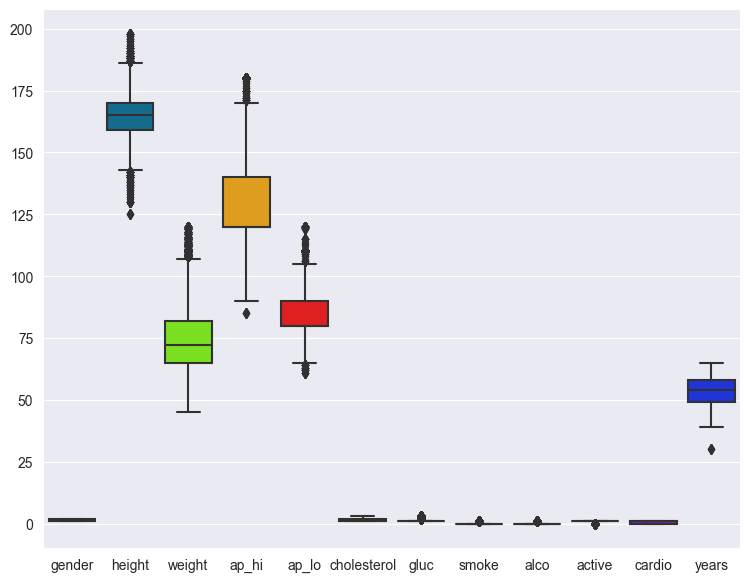

In [32]:
sns.set_style(style='darkgrid')
plt.figure(figsize=(9, 7))
sns.boxplot(data=df.drop(['age'], axis=1) , palette='prism')
plt.show()

Although we can still visualize outliers but these are geninue values and don't have major impact on training models.

## Training and testing models

In [33]:
from sklearn.model_selection import train_test_split

# Splitting our data for training and testing
X = df.drop(['cardio', 'years'], axis=1)
y = df['cardio']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=True)

### Data correlation matrix

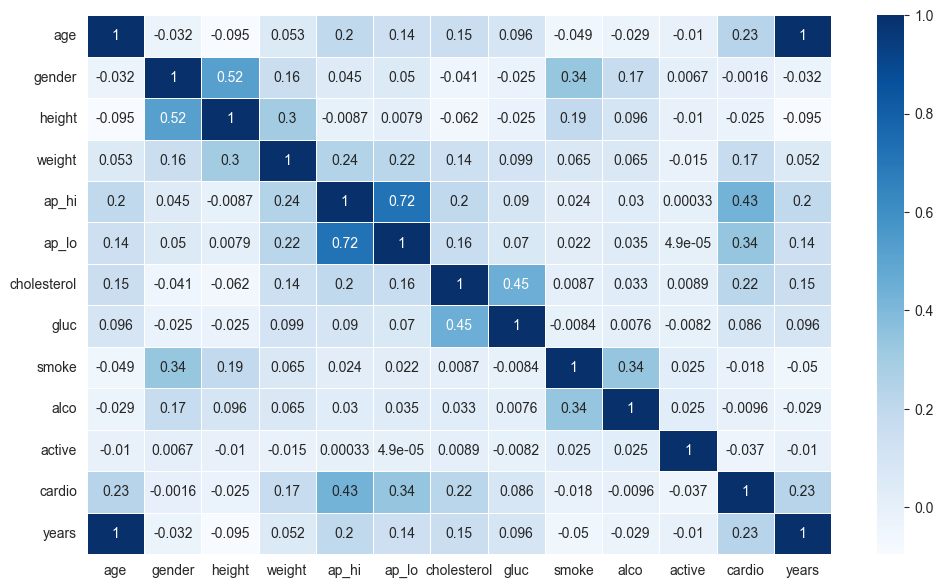

In [34]:
plt.figure(figsize=(12, 7))
sns.heatmap(df.corr(),linewidths=0.5 , annot=True, cmap='Blues')
plt.show()

As we can see age and cholesterol have significant impact, but not very high correlated with target class.

### Logistic Regression

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

log_rg = LogisticRegression()
log_rg.fit(X_train, y_train)

y_pred = log_rg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {round(accuracy*100, 2)}%')


Accuracy: 69.8%


### Decision Tree

In [36]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion='gini', random_state=True)
dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {round(accuracy*100, 2)}%')

Accuracy: 63.16%


### KNN Classifier

In [37]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {round(accuracy*100, 2)}%')

Accuracy: 70.17%


### Gaussian Naive Bayes

In [38]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)

y_pred = gnb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {round(accuracy*100, 2)}%')

Accuracy: 71.04%


### AdaBoost Classifier

In [39]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier()
ada.fit(X_train, y_train)

y_pred = ada.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {round(accuracy*100, 2)}%')

Accuracy: 72.54%


### Confusion matrix

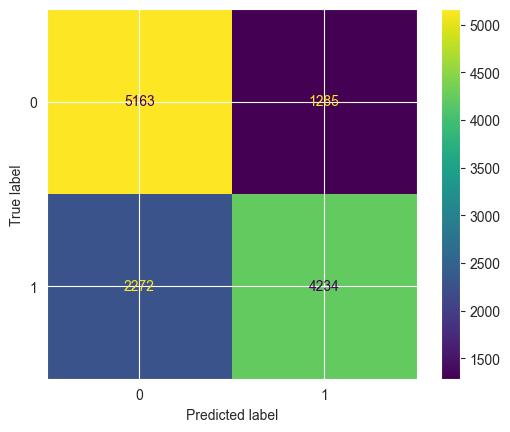

In [40]:
from sklearn import metrics

actual = y_test
predicted = y_pred

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)

cm_display.plot()
plt.show() 

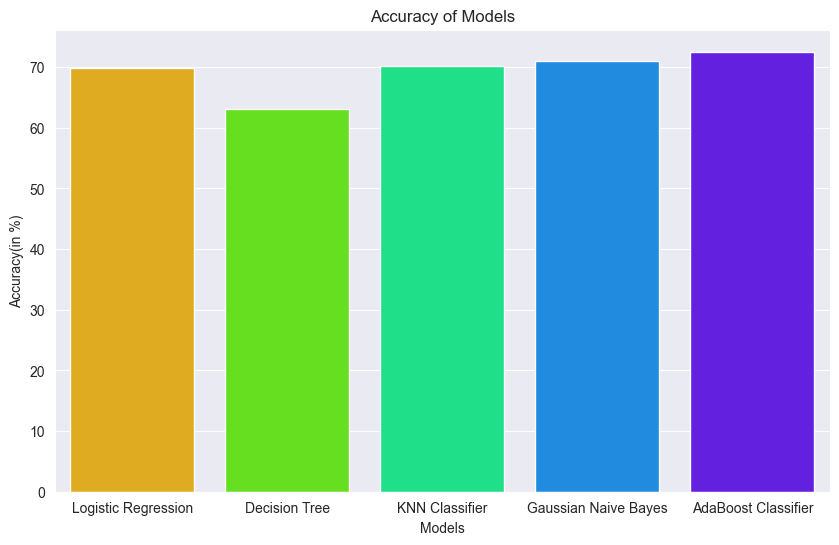

In [41]:
plt.figure(figsize=(10, 6))
accuracy_values = [69.80, 63.16, 70.17, 71.04, 72.54]
sns.barplot(x=['Logistic Regression', 'Decision Tree', 'KNN Classifier', 'Gaussian Naive Bayes', 'AdaBoost Classifier'], y=accuracy_values
            , palette='gist_rainbow')

plt.xlabel('Models')
plt.ylabel('Accuracy(in %)')
plt.title('Accuracy of Models')
plt.show()

As we can clearly see that AdaBoost Classifier has highest accuracy. So this is the best model to use.

### Saving trained model

In [42]:
import joblib

joblib.dump(ada, 'cvd_prediction.pkl')

['cvd_prediction.pkl']